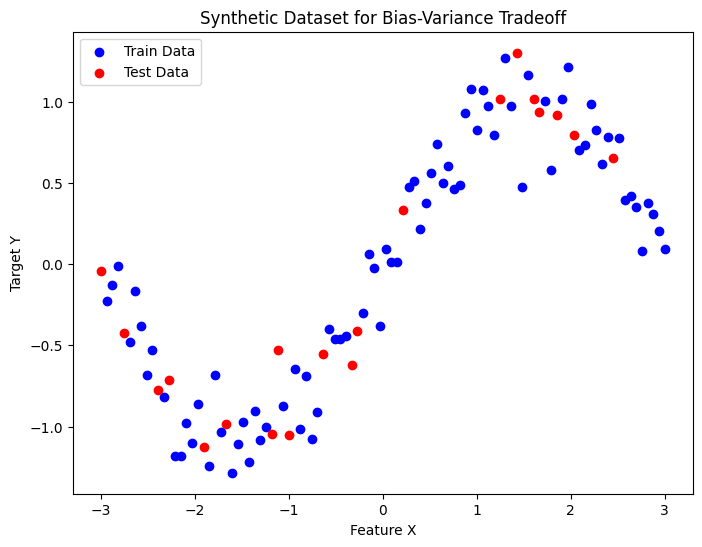

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic data (Non-linear relationship)
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.2, X.shape)  # Adding noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scatter plot of the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label="Train Data", color='blue')
plt.scatter(X_test, y_test, label="Test Data", color='red')
plt.title("Synthetic Dataset for Bias-Variance Tradeoff")
plt.xlabel("Feature X")
plt.ylabel("Target Y")
plt.legend()
plt.show()


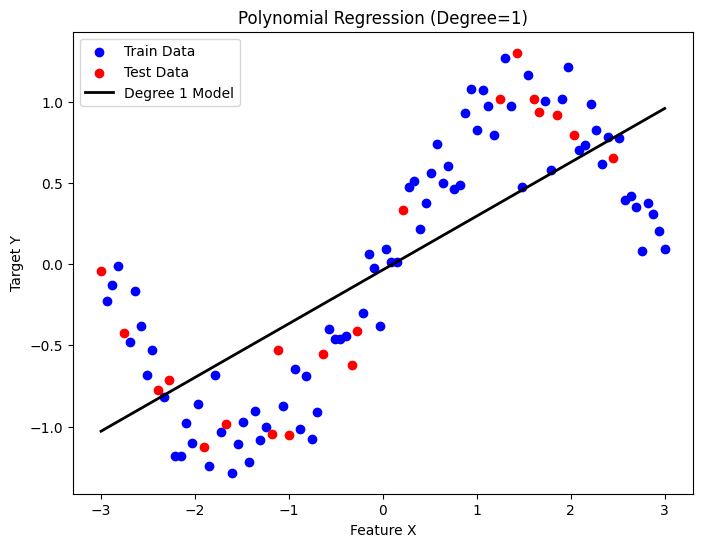

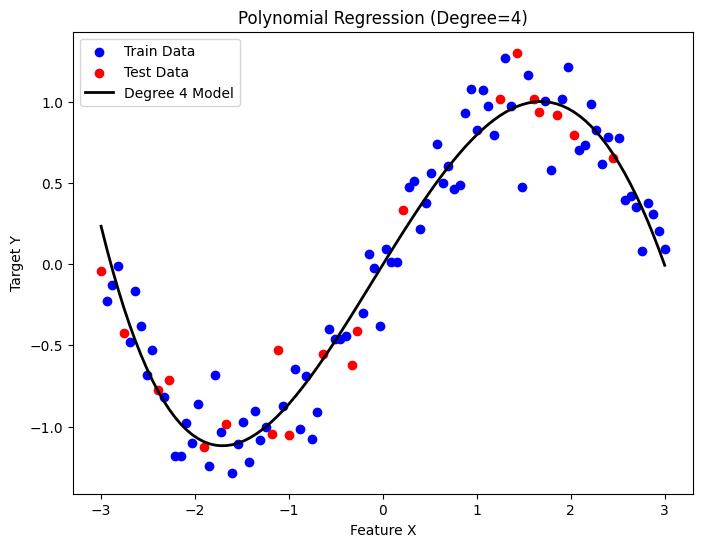

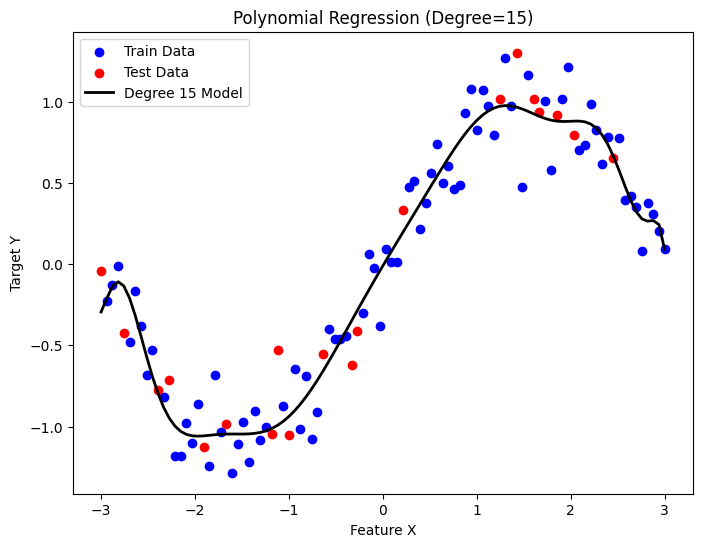

In [2]:
# Function to train & visualize models
def plot_model(degree, X_train, y_train, X_test, y_test):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Predictions
    X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_pred = model.predict(X_range)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label="Train Data", color='blue')
    plt.scatter(X_test, y_test, label="Test Data", color='red')
    plt.plot(X_range, y_pred, label=f"Degree {degree} Model", color='black', linewidth=2)
    plt.title(f"Polynomial Regression (Degree={degree})")
    plt.xlabel("Feature X")
    plt.ylabel("Target Y")
    plt.legend()
    plt.show()

# Underfitting (High Bias)
plot_model(1, X_train, y_train, X_test, y_test)  # Degree = 1 (Linear Model)

# Optimal Model (Balanced)
plot_model(4, X_train, y_train, X_test, y_test)  # Degree = 4 (Well-balanced)

# Overfitting (High Variance)
plot_model(15, X_train, y_train, X_test, y_test)  # Degree = 15 (Overfits)


In [3]:
from sklearn.metrics import mean_squared_error

# Function to compute MSE
def evaluate_model(degree, X_train, y_train, X_test, y_test):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"Degree {degree} Model:")
    print(f"  Train MSE: {train_mse:.4f}")
    print(f"  Test MSE:  {test_mse:.4f}\n")

# Evaluate all models
evaluate_model(1, X_train, y_train, X_test, y_test)  # Underfitting
evaluate_model(4, X_train, y_train, X_test, y_test)  # Optimal
evaluate_model(15, X_train, y_train, X_test, y_test)  # Overfitting


Degree 1 Model:
  Train MSE: 0.2363
  Test MSE:  0.2376

Degree 4 Model:
  Train MSE: 0.0341
  Test MSE:  0.0325

Degree 15 Model:
  Train MSE: 0.0286
  Test MSE:  0.0346



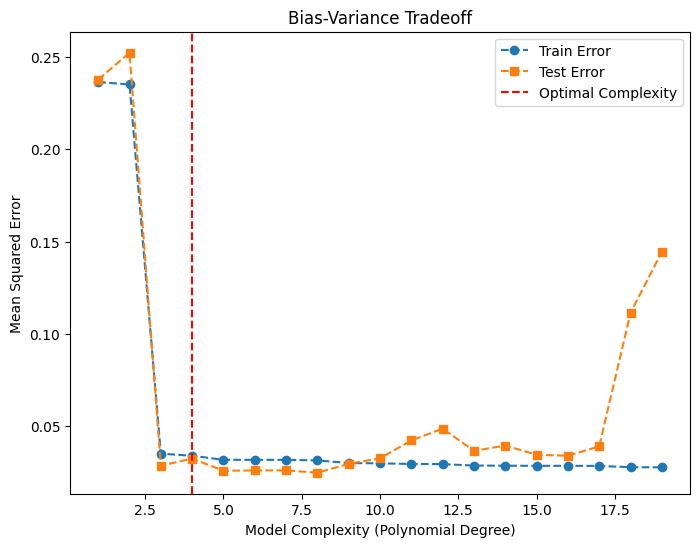

In [4]:
degrees = range(1, 20)
train_errors = []
test_errors = []

for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)

    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label="Train Error", marker='o', linestyle='dashed')
plt.plot(degrees, test_errors, label="Test Error", marker='s', linestyle='dashed')
plt.axvline(x=4, color='r', linestyle='--', label="Optimal Complexity")  # Optimal point
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.show()
